# Unbiasing COVID-19 Case Count
Kartik Chugh - May 3, 2020

 <img src="china-data.png" />

In [213]:
import numpy as np
import pandas as pd
from pandas import Timestamp, Series
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.3f}'.format})

%config InlineBackend.figure_format = 'retina'

In [152]:
ONSET_TO_DEATH = 17 # https://midasnetwork.us/covid-19/
MORTALITY_RATE = 0.01
#DOUBLING_TIME = 2.5

In [139]:
url = 'https://covidtracking.com/api/v1/us/daily.csv'
df = pd.read_csv(url, 
            usecols=['date', 'positiveIncrease', 'deathIncrease', 'positive'], 
            parse_dates=['date'], 
            index_col=['date']).sort_index().iloc[1:]

time = df.index
#positive = np.array(df['positive'])

In [112]:
pd.set_option('display.max_rows', None)
df

,positive,deathIncrease,positiveIncrease
date,,,
2020-02-22,2,0.0,0.0
2020-02-23,2,0.0,0.0
2020-02-24,2,0.0,0.0
2020-02-25,2,0.0,0.0
2020-02-26,2,2.0,0.0
2020-02-27,2,0.0,0.0
2020-02-28,9,2.0,7.0
2020-02-29,18,1.0,9.0
2020-03-01,40,3.0,22.0


In [198]:
def doublingTime(a, b):
    return np.log(2)/np.log(b/a) if (a != b) else np.nan

lower = 2.4
doubling = np.zeros(df['positive'].shape)
for t in range(1, len(doubling)):
    doubling[t] = doublingTime(df['positive'][t-1], df['positive'][t])
    
doubling_orig = pd.DataFrame(doubling, columns=['doubling time'], index=time)
    
doubling_smooth = doubling_orig.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round().clip(lower=lower).fillna(lower)

In [199]:
doubling_smooth

,doubling time
date,
2020-01-23,2.4
2020-01-24,2.4
2020-01-25,2.4
2020-01-26,2.4
2020-01-27,2.4
2020-01-28,2.4
2020-01-29,2.4
2020-01-30,2.4
2020-01-31,2.4


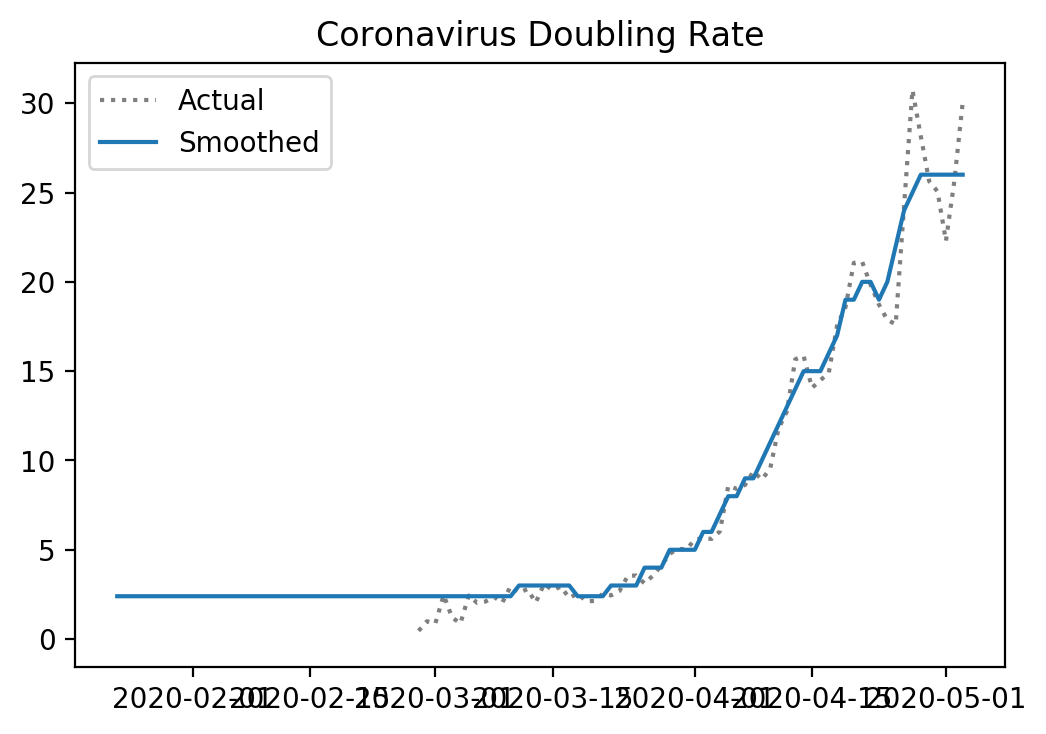

In [200]:
plt.plot(doubling_orig, c='k', ls=':', alpha=.5)
plt.plot(doubling_smooth)
plt.legend(['Actual', 'Smoothed'])
plt.title('Coronavirus Doubling Rate')
plt.show()

In [201]:
t_init = df['deathIncrease'].ne(0).idxmax()
t_init

Timestamp('2020-02-26 00:00:00')

In [202]:
t0 = t_init - timedelta(days=ONSET_TO_DEATH)
t0

Timestamp('2020-02-09 00:00:00')

In [204]:
D0 = df['deathIncrease'][firstDeathDate]
D0

2.0

In [205]:
C0 = D0 / MORTALITY_RATE
C0

200.0

In [217]:
C1 = C0 * 2**(1/doubling_smooth['doubling time'][t0+timedelta(days=1)])
C1

266.96797083400685

In [222]:
Cn1 = C0 / 2**(1/doubling_smooth['doubling time'][t0-timedelta(days=1)])
Cn1

149.83070768766814

In [223]:
C = np.full(df['positive'].shape, C0)

In [208]:
for t in range(0, len(C)):
    dt = t0-timedelta()

for t in range(1, (df.index[-1]-t0).days):
       C[t] = C[t-1] * 2**(1/doubling_smooth['doubling time'][t])

In [209]:
C

array([200.000, 266.968, 356.359, 475.683, 634.960, 847.570, 1131.371,
       1510.199, 2015.874, 2690.869, 3591.879, 4794.583, 6400.000,
       8542.975, 11403.504, 15221.851, 20318.733, 27122.255, 36203.867,
       48326.365, 64507.958, 86107.793, 114940.114, 153426.645,
       204800.000, 273375.202, 364912.115, 487099.234, 650199.471,
       867912.167, 1158523.750, 1546443.674, 2064254.648, 2755449.374,
       3678083.640, 4909652.630, 6553600.000, 8748006.468, 11677187.678,
       15587175.498, 20806383.068, 27773189.341, 37072760.009,
       49486197.565, 66056148.741, 88174379.952, 117698676.477,
       157108884.144, 197944790.259, 249394807.964, 314217768.289,
       395889580.518, 498789615.928, 628435536.577, 791779161.036,
       1056898379.852, 1410790079.234, 1883178823.629, 2513742146.309,
       3167116644.142, 3990316927.427, 5027484292.618, 6334233288.285,
       7532715294.516, 8957958623.528, 10652868130.999, 12236932098.079,
       14056543771.274, 16146728707.006

In [215]:
df['true'] = 

,positive,deathIncrease,positiveIncrease,0,1,2,3,4,5,6,...,74,75,76,77,78,79,80,81,82,83
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31 00:00:00,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
